# Model Optimization Attempts on Intesively preprocessed dataset

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import preproc_funcs as pf

#  Import and read the charity_data.csv.
import pandas as pd 

## Attempt 1: 

In [2]:
model_data_df, final_df = pf.intensive_preprocessing()
model_data_df

C:\Users\jonat\UO_Bootcamp\Mod_19\git_Neural_Network_Charity_Analysis\Neural_Network_Charity_Analysis\preproc_funcs.py:67: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  model_data_df = model_data_df.drop(final_cat,1)


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,Amt_Binned_A,Amt_Binned_B,Amt_Binned_C
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34295,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34296,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34297,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
for column in final_df:
    print(final_df[column].value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64
A    25398
B     6674
C     2227
Name: Amt_Binned, dtype: int64


In [6]:
# Split our preprocessed data into our features and target arrays
y = model_data_df.IS_SUCCESSFUL.values
X = model_data_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\jonat\AppData\Local\Temp\ipykernel_26748\1781828065.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = model_data_df.drop(["IS_SUCCESSFUL"],1).values


In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.089408,-0.123588,-0.178463,0.520286,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,1.080344,...,-0.0108,0.472261,-0.447443,1.527695,-0.119471,-0.03638,-1.473467,0.590639,-0.490579,-0.262899
1,-0.089408,-0.123588,-0.178463,-1.922020,-0.218484,-0.189309,5.154733,-0.14518,-0.150399,-0.925631,...,-0.0108,-2.117473,2.234921,-0.654581,-0.119471,-0.03638,0.678672,0.590639,-0.490579,-0.262899
2,-0.089408,-0.123588,-0.178463,0.520286,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,-0.925631,...,-0.0108,0.472261,-0.447443,-0.654581,-0.119471,-0.03638,0.678672,0.590639,-0.490579,-0.262899
3,-0.089408,-0.123588,-0.178463,0.520286,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,-0.925631,...,-0.0108,0.472261,-0.447443,-0.654581,-0.119471,-0.03638,0.678672,0.590639,-0.490579,-0.262899
4,-0.089408,8.091371,-0.178463,-1.922020,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,1.080344,...,-0.0108,0.472261,-0.447443,1.527695,-0.119471,-0.03638,-1.473467,0.590639,-0.490579,-0.262899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25719,-0.089408,-0.123588,-0.178463,0.520286,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,1.080344,...,-0.0108,0.472261,-0.447443,-0.654581,-0.119471,-0.03638,0.678672,0.590639,-0.490579,-0.262899
25720,-0.089408,-0.123588,-0.178463,-1.922020,-0.218484,5.282364,-0.193996,-0.14518,-0.150399,-0.925631,...,-0.0108,-2.117473,2.234921,1.527695,-0.119471,-0.03638,-1.473467,0.590639,-0.490579,-0.262899
25721,-0.089408,-0.123588,-0.178463,0.520286,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,1.080344,...,-0.0108,0.472261,-0.447443,1.527695,-0.119471,-0.03638,-1.473467,0.590639,-0.490579,-0.262899
25722,-0.089408,-0.123588,-0.178463,0.520286,-0.218484,-0.189309,-0.193996,-0.14518,-0.150399,1.080344,...,-0.0108,0.472261,-0.447443,1.527695,-0.119471,-0.03638,-1.473467,0.590639,-0.490579,-0.262899


### Compile, Train and Evaluate the Model

In [10]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 66
hidden_nodes_layer2 = 33
hidden_nodes_layer3 = 10

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="leaky_relu"
    )
)
# Second hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="leaky_relu"
))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="leaky_relu"
))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 66)                2112      
                                                                 
 dense_2 (Dense)             (None, 33)                2211      
                                                                 
 dense_3 (Dense)             (None, 10)                340       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,674
Trainable params: 4,674
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_new/",exist_ok=True)
checkpoint_path = "checkpoints_new/weights.{epoch:02d}.hdf5"

In [13]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5666 - accuracy: 0.7201
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7268
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7275
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5506 - accuracy: 0.7283
Epoch 5/50
784/804 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7289
Epoch 5: saving model to checkpoints_new\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7289
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7293
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7294
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7294
Epoch 9/50
804/804 [==============================] - 2s 2

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5506 - accuracy: 0.7292 - 497ms/epoch - 2ms/step
Loss: 0.550564706325531, Accuracy: 0.7292128205299377


In [16]:
# Export the model to HDF5 file
nn_new.save("trained_application_new_v1.h5")

<AxesSubplot:>

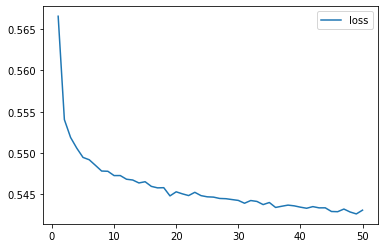

In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

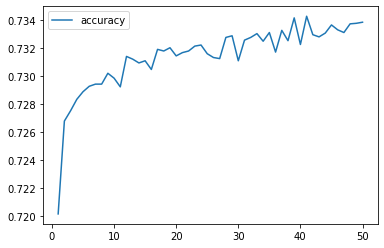

In [18]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 2: Give the model all of the data

### Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = 150
hidden_nodes_layer3 = 50

nn_new_v2 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v2.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Third hidden layer
nn_new_v2.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, 
    activation="relu"
))

# Output layer
nn_new_v2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 93)                2976      
                                                                 
 dense_6 (Dense)             (None, 150)               14100     
                                                                 
 dense_7 (Dense)             (None, 50)                7550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 24,677
Trainable params: 24,677
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn_new_v2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v2/",exist_ok=True)
checkpoint_path = "checkpoints_new_v2/weights.{epoch:02d}.hdf5"

In [23]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v2.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7353
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5388 - accuracy: 0.7356
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5389 - accuracy: 0.7354
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5385 - accuracy: 0.7354
Epoch 5/50
800/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7354
Epoch 5: saving model to checkpoints_new_v2\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5391 - accuracy: 0.7357
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5389 - accuracy: 0.7358
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5391 - accuracy: 0.7356
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5385 - accuracy: 0.7353
Epoch 9/50
804/804 [==============================] - 2

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5678 - accuracy: 0.7297 - 471ms/epoch - 2ms/step
Loss: 0.5677773952484131, Accuracy: 0.72967928647995


In [25]:
# Export the model to HDF5 file
nn_new_v2.save("trained_application_new_v2.h5")

<AxesSubplot:>

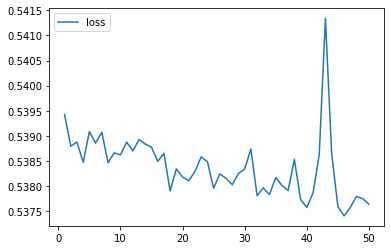

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

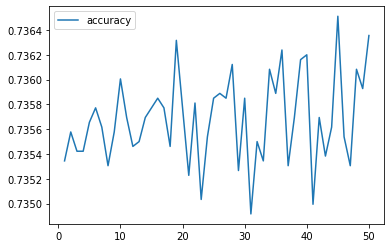

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 3: 

### Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 10

nn_new_v3 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v3.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v3.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1600      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,121
Trainable params: 2,121
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn_new_v3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v3/",exist_ok=True)
checkpoint_path = "checkpoints_new_v3/weights.{epoch:02d}.hdf5"

In [31]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v3.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5663 - accuracy: 0.7210
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7265
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7282
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7292
Epoch 5/50
792/804 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.7281
Epoch 5: saving model to checkpoints_new_v3\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7279
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7282
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7301
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7294
Epoch 9/50
804/804 [==============================] - 2

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5499 - accuracy: 0.7283 - 400ms/epoch - 1ms/step
Loss: 0.5498743057250977, Accuracy: 0.7282798886299133


In [33]:
# Export the model to HDF5 file
nn_new_v3.save("trained_application_new_v3.h5")

<AxesSubplot:>

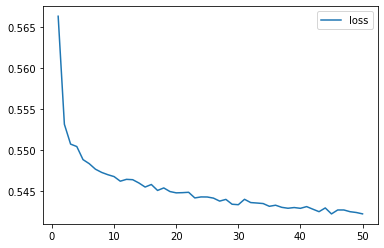

In [34]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

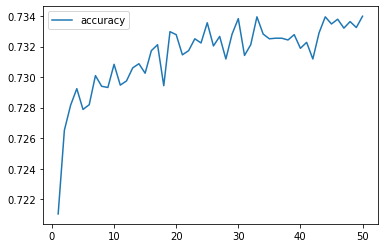

In [35]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Atempt 4

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 150
hidden_nodes_layer2 = 75
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 25

nn_new_v4 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v4.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v4.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               4800      
                                                                 
 dense_13 (Dense)            (None, 75)                11325     
                                                                 
 dense_14 (Dense)            (None, 75)                5700      
                                                                 
 dense_15 (Dense)            (None, 75)                5700      
                                                                 
 dense_16 (Dense)            (None, 1)                 76        
                                                                 
Total params: 27,601
Trainable params: 27,601
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn_new_v4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v4/",exist_ok=True)
checkpoint_path = "checkpoints_new_v4/weights.{epoch:02d}.hdf5"

In [39]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v4.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5651 - accuracy: 0.7218
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7274
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5521 - accuracy: 0.7272
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7295
Epoch 5/50
783/804 [============================>.] - ETA: 0s - loss: 0.5488 - accuracy: 0.7299
Epoch 5: saving model to checkpoints_new_v4\weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5497 - accuracy: 0.7294
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7311
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7306
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7317
Epoch 9/50
804/804 [==============================] - 2

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5575 - accuracy: 0.7284 - 467ms/epoch - 2ms/step
Loss: 0.5574503540992737, Accuracy: 0.728396475315094


In [41]:
# Export the model to HDF5 file
nn_new_v4.save("trained_application_new_v4.h5")

<AxesSubplot:>

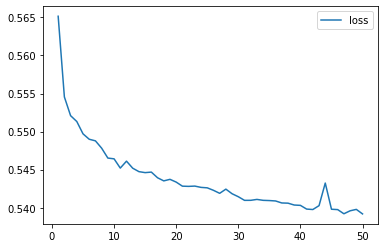

In [42]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

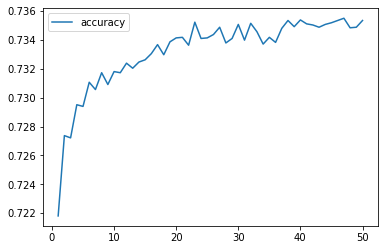

In [43]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Attempt 5

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3*number_input_features
hidden_nodes_layer2 = np.floor(0.5*hidden_nodes_layer1)
hidden_nodes_layer3 = np.floor(0.5*hidden_nodes_layer1)
hidden_nodes_layer4 = np.floor(0.5*hidden_nodes_layer2)

nn_new_v5 = tf.keras.models.Sequential()

# First hidden layer
nn_new_v5.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1, 
        input_dim=number_input_features, 
        activation="relu"
    )
)
# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Second hidden layer
nn_new_v5.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, 
    activation="relu"
))

# Output layer
nn_new_v5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new_v5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 93)                2976      
                                                                 
 dense_18 (Dense)            (None, 46)                4324      
                                                                 
 dense_19 (Dense)            (None, 46)                2162      
                                                                 
 dense_20 (Dense)            (None, 46)                2162      
                                                                 
 dense_21 (Dense)            (None, 1)                 47        
                                                                 
Total params: 11,671
Trainable params: 11,671
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
nn_new_v5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_new_v5/",exist_ok=True)
checkpoint_path = "checkpoints_new_v5/weights.{epoch:02d}.hdf5"

In [47]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn_new_v5.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5654 - accuracy: 0.7222
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7267
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7289
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7276
Epoch 5/50
790/804 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7309
Epoch 5: saving model to checkpoints_new_v5\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7308
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7311
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.7316
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.7312
Epoch 9/50
804/804 [==============================] - 2

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new_v5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5584 - accuracy: 0.7282 - 443ms/epoch - 2ms/step
Loss: 0.5583819150924683, Accuracy: 0.7281632423400879


In [49]:
# Export the model to HDF5 file
nn_new_v5.save("trained_application_new_v5.h5")

<AxesSubplot:>

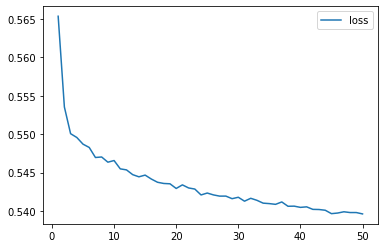

In [50]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

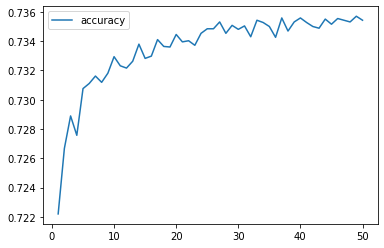

In [51]:
# Plot the accuracy
history_df.plot(y="accuracy")